# Visualizing Bag of Words(BOW) on Amazon Fine Food Review Dataset

#### 1.Import statements

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

# !pip install -U gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import re
import os

#### 2. Connecting to the Database file using pandas library and retriving the data from 'CleanedText' column

* This Data is the result of the data pre-processing in the 'Data Pre-processing for t-SNE on Amazon Review Dataset.ipynb' file on the Amazon Fine Food Review Dataset. The review data from the original dataset is processed(cleaned) and stored in the same db file for further use.

In [3]:
#Access reviews data from 'final.sqlite' file
if os.path.isfile('final.sqlite'):
    conn = sqlite3.connect('final.sqlite')
    final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, conn)
    conn.close()
else:
    print("Please the above cell")

####  3. Dimensionality reduction of the TF-IDF Vectors for Review text using t-SNE in Scikit-Learn

* Applying the TF-IDF on processed data in 'CleanedText' column using 'TfidfVectorizer' in sklearn results us the sparse matrix representation of the review data.

* TF-IDF is applied to only first 8000 datapoints in the dataset because of several factors meantioned in the BOW scenario and also here we are considering the unigrams and bi-grams as well. As the rule says, no. of n-grams are always greater than (n-1)-grams. So, the dimensionality of the resulting tf-idf vector is (364171, 2923725), which is 40% increase in the no. of vectors in the results compared to BOW and this has a serious impact on the memory usage.

* TF: Term Frequency is nothing but how popular is the word in the given document. 

* IDF: Inverse document frequency is a measure of how common or rare across all documents/ text corpus

* TfidfVectorizer: This converts the 'CleanedText' column to TF-IDF vectors. The parameter used is a below:

    1) ngram_range: The lower and the upper boundries of the different n-grams to be made out of the text data. Ex: ngram_range=(1,2): Here only unigram and bigrams are considered.



In [4]:
# [7.2.5] TF-IDF
final = final[0:8000]
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(final['CleanedText'].values)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (8000, 182012)
the number of unique words including both unigrams and bigrams  182012


* The dimensionality of Sparse matrix obtained after applying TF-IDF on Review text('CleanedText' column) is (364171, 2923725)

In [5]:
from sklearn.preprocessing import StandardScaler
data_5000 = final_tf_idf
sc = StandardScaler(copy=True, with_mean=False, with_std=True)
data_5000 = sc.fit_transform(data_5000)

### Plotting the dimensionality reduced matrix produced by t-SNE using Seaborn

* The following plots are for 8000 points in the dataset which are standardized.

* The plots are for 5000 iterations and 5 different perplexities 30, 50, 75, 100

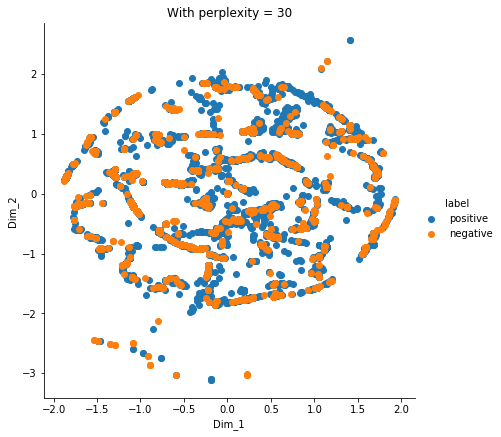

In [6]:
# data_5000 = final_tf_idf[0:5000,:]
top_5000 = data_5000.toarray()
labels = final['Score']
labels_5000 = labels[0:8000]

from MulticoreTSNE import MulticoreTSNE as TSNE
# from sklearn.manifold import TSNE

model = TSNE(n_jobs = 14, n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_data = model.fit_transform(top_5000)

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_5000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.title('With perplexity = 30')
plt.show()

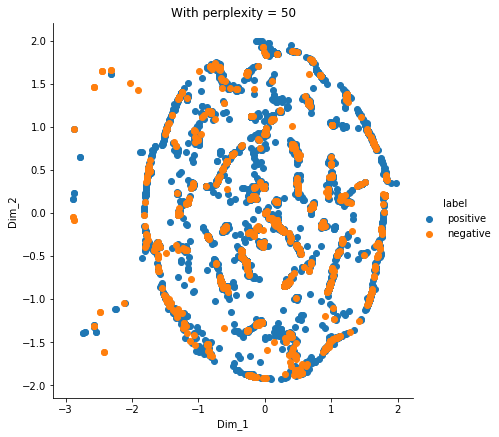

In [7]:
model = TSNE(n_jobs = 14, n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(top_5000)

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_5000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.title('With perplexity = 50')
plt.show()

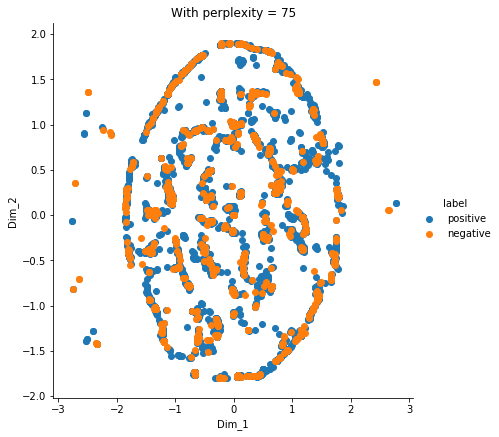

In [8]:
model = TSNE(n_jobs = 14, n_components=2, random_state=0, perplexity=75, n_iter=5000)
tsne_data = model.fit_transform(top_5000)

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_5000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.title('With perplexity = 75')
plt.show()

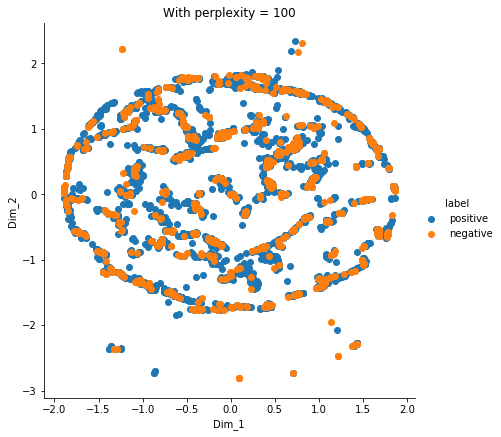

In [9]:
model = TSNE(n_jobs = 14, n_components=2, random_state=0, perplexity=100, n_iter=5000)
tsne_data = model.fit_transform(top_5000)

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_5000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.title('With perplexity = 100')
plt.show()

# Observations:

* At the first glance at the plots, the points on all the plots are better clustered than BOW plot and offer a better plot. All the shapes of all the plots are almost similar to each other.

* This doesn't mean by any chance that positive and the negative points are well segregated as we were expecting it. This is because the words in the positive and the negative reviews might have the same/similar words in them but with very few variations/changes. This means the points might be very close to each other geometrically due to presence of similar words and mean quite opposite in english meaning.

* The above point will happen because the TF-IDF vectors aren't considering the semantic meaning of the senetences rather they are just considering only the occurances of the words. 